## Download


## Goal of Week 2

This week we will:

+ Take a look at **pandas**, an open source, BSD-licensed library providing **high-performance, easy-to-use data structures and data analysis** tools
+ Load in Excel (.xls or .csv) files to use in Python
    - Managing headers
    - Read-in only certain columns
+ Do some data manipulation:
    - List the names of the columns
    - Renaming columns
    - Create a new column
    - Doing math operations between two columns
    - Filtering out data or a subset of data
+ Do some plotting using Matplotlib, a very nice 2D plotting library in Python
    - Plot a histogram
    - Plot scatter plots
    - Plot normal plots
    - Modify the x-axis's title, y-axis's title, figure's title
+ If we have time, we can go through a quick example to show how powerful pandas is when it renders tens of thousands of rows super quickly.

## Note
+ Remember to run each invidual cell you can hit Ctrl+Enter
+ If you want to add a cell above or below, you can hit Esc + A or Esc + B. Or you can go to the toolbar at the top -> Insert -> Insert Cell Above/Insert Cell Below
+ If you want to run all the cells altogether, go to the toolbar -> Cell -> Run All.
+ In the case something catastrophic happens and everything explodes, keep calmn, go to the the toolbar -> Kernal -> Restart


## Let's get started

Before we start, let's first **import** the pandas package. The syntax is typically:

```python
import nameOfPackage
```
However, whenever you import a package and call a function from that package, you will have to write explicitly the name of the package. So I'm gonna rename the pandas package to something shorter, like pd.

```python
import pandas as pd
```

The "as" syntax will allow me to refer to the pandas package as pd from now on.

In [44]:
import pandas as pd

Let's read in some data. Our file is an .xls file and it has 2 sheets. I don't know how to do that, so I will google "pandas read in excel file multiple sheets" and see what happens.

First _useful_ result came up was: http://stackoverflow.com/questions/26521266/using-pandas-to-pd-read-excel-for-multiple-worksheets-of-the-same-workbook so I'm gonna do what the upvoted did.

In [45]:
xls = pd.ExcelFile(r'C:\Users\jenng\Documents\texaspse-blog\media\f16-scientific-python\week2\myExcelData.xls')
temp_table = xls.parse('Temperature')
liquid_flow_table = xls.parse('Liquid Flow')

Let's take a look at the "tables" we read in. By the way, in Python pandas terms, the data structure of the data we read in is called a DataFrame. This is the reason why when you search for answers online, a lot of people will refer to their variable names as `df`.

In [46]:
temp_table

,"K-type TC, °C","T-type TC, °C"
0,69.38,70.06
1,69.34,70.05
2,69.31,70.08
3,69.34,70.10
4,69.35,70.10
5,69.31,70.06
6,69.35,70.12
7,69.37,70.12
8,69.38,70.08
9,69.35,70.15


That's beautiful. Now pandas has a nice function called head() that summarizes our data. Right now our data only has 2 columns and maybe 10+ rows. But head() is going to be super useful to have a giant table of 1000 rows x 1000 columns. This is how you use it. 

In [47]:
temp_table.head()

,"K-type TC, °C","T-type TC, °C"
0,69.38,70.06
1,69.34,70.05
2,69.31,70.08
3,69.34,70.10
4,69.35,70.10


If you search up the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html), you will see we can pass in an argument of how many rows we want to show. Let's see if we can show the first 7 rows.

In [48]:
temp_table.head(7)

,"K-type TC, °C","T-type TC, °C"
0,69.38,70.06
1,69.34,70.05
2,69.31,70.08
3,69.34,70.10
4,69.35,70.10
5,69.31,70.06
6,69.35,70.12


That works! Let's now doing some fun stuff with pandas. I want to rename the two columns in liquid_table_temp to "Primary" and "Ultrasonic". Let's take a look at the current column names first. As always, I googled "list of column names" and found [this Stackoverflow answer](http://stackoverflow.com/questions/19482970/get-list-from-pandas-dataframe-column-headers).

In [49]:
list(liquid_flow_table.columns.values)

['Primary Std, Avg mL/s', 'Ultrasonic, mL/S']

Cool. Let's rename it now. Again, I googled "pandas rename column" and found http://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

In [50]:
liquid_flow_table = liquid_flow_table.rename(columns={'Primary Std, Avg mL/s': 'Primary', 
                        'Ultrasonic, mL/S': 'Ultrasonic',})

Let's check it now:

In [51]:
liquid_flow_table.head() # Great! It worked like we wanted.

,Primary,Ultrasonic
0,60.64,57.68
1,60.64,58.40
2,50.49,48.17
3,50.49,48.83
4,39.62,38.02


Let's say I, for some reasons, want to add the primary + ultrasonic together and create a new column called mySum. Again, googled for "pandas add column together" and found http://stackoverflow.com/questions/22342285/summing-two-columns-in-a-pandas-dataframe

In [52]:
liquid_flow_table['mySum'] = liquid_flow_table.Primary + liquid_flow_table.Ultrasonic
liquid_flow_table.head() #check my table to see if it did add

,Primary,Ultrasonic,mySum
0,60.64,57.68,118.32
1,60.64,58.40,119.04
2,50.49,48.17,98.66
3,50.49,48.83,99.32
4,39.62,38.02,77.64


In [53]:
liquid_flow_table['myMultiplication'] = liquid_flow_table['Primary'] * liquid_flow_table['Ultrasonic']
liquid_flow_table.head() #check my table to see if it did multiply

,Primary,Ultrasonic,mySum,myMultiplication
0,60.64,57.68,118.32,3497.7152
1,60.64,58.40,119.04,3541.3760
2,50.49,48.17,98.66,2432.1033
3,50.49,48.83,99.32,2465.4267
4,39.62,38.02,77.64,1506.3524


In [54]:
liquid_flow_table['myPower'] = liquid_flow_table.Primary ** liquid_flow_table.Ultrasonic
liquid_flow_table.head() #check my table to see if it did multiply

,Primary,Ultrasonic,mySum,myMultiplication,myPower
0,60.64,57.68,118.32,3497.7152,6.753832e+102
1,60.64,58.40,119.04,3541.3760,1.297588e+104
2,50.49,48.17,98.66,2432.1033,1.105103e+82
3,50.49,48.83,99.32,2465.4267,1.470680e+83
4,39.62,38.02,77.64,1506.3524,5.658590e+60


Let's say now I want to create a new column that is the cumulative sum of `Ultrasonic`.

In [55]:
liquid_flow_table['CumulativeSum'] = liquid_flow_table.Ultrasonic.cumsum()
liquid_flow_table

,Primary,Ultrasonic,mySum,myMultiplication,myPower,CumulativeSum
0,60.64,57.68,118.32,3497.7152,6.753832e+102,57.68
1,60.64,58.40,119.04,3541.3760,1.297588e+104,116.08
2,50.49,48.17,98.66,2432.1033,1.105103e+82,164.25
3,50.49,48.83,99.32,2465.4267,1.470680e+83,213.08
4,39.62,38.02,77.64,1506.3524,5.658590e+60,251.10
5,39.62,38.47,78.09,1524.1814,2.963260e+61,289.57
6,28.55,27.23,55.78,777.4165,4.326677e+39,316.80
7,28.55,27.77,56.32,792.8335,2.643515e+40,344.57
8,18.19,17.45,35.64,317.4155,9.640079e+21,362.02
9,18.19,17.67,35.86,321.4173,1.824920e+22,379.69


Now let's say I want to divide this CumulativeSum by the maximum of that Cumulative Sum column. I'm going to call the new column something arbitrary, "myDivision".

Again, I don't know how to find the max of the CumulativeSum column so I googled "pandas max value in column". Found this http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html

In [56]:
liquid_flow_table['CumulativeSum'].max() #looks right

379.69

In [57]:
liquid_flow_table['myDivision'] = liquid_flow_table['CumulativeSum']/liquid_flow_table['CumulativeSum'].max()
liquid_flow_table.head()

,Primary,Ultrasonic,mySum,myMultiplication,myPower,CumulativeSum,myDivision
0,60.64,57.68,118.32,3497.7152,6.753832e+102,57.68,0.151913
1,60.64,58.40,119.04,3541.3760,1.297588e+104,116.08,0.305723
2,50.49,48.17,98.66,2432.1033,1.105103e+82,164.25,0.432590
3,50.49,48.83,99.32,2465.4267,1.470680e+83,213.08,0.561195
4,39.62,38.02,77.64,1506.3524,5.658590e+60,251.10,0.661329


Now let's say I want to sort the table based on the `Primary` column from smallest to largest.

In [58]:
liquid_flow_table.sort('Primary', ascending=True, inplace=True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Apparently the sort() we are trying to use is deprecreted, I don't know what that quite mean but I'm gonna do what it says and use sort_values() instead

In [59]:
liquid_flow_table.sort_values(by='Primary', ascending=True, inplace=True)
liquid_flow_table.head()

,Primary,Ultrasonic,mySum,myMultiplication,myPower,CumulativeSum,myDivision
8,18.19,17.45,35.64,317.4155,9.640079e+21,362.02,0.953462
9,18.19,17.67,35.86,321.4173,1.824920e+22,379.69,1.000000
6,28.55,27.23,55.78,777.4165,4.326677e+39,316.80,0.834365
7,28.55,27.77,56.32,792.8335,2.643515e+40,344.57,0.907503
4,39.62,38.02,77.64,1506.3524,5.658590e+60,251.10,0.661329


Now let's do some filtering. I want my table to **only shows Primary values that are greater than 40**. Let's first take a look at the original table before we move on.

In [60]:
liquid_flow_table

,Primary,Ultrasonic,mySum,myMultiplication,myPower,CumulativeSum,myDivision
8,18.19,17.45,35.64,317.4155,9.640079e+21,362.02,0.953462
9,18.19,17.67,35.86,321.4173,1.824920e+22,379.69,1.000000
6,28.55,27.23,55.78,777.4165,4.326677e+39,316.80,0.834365
7,28.55,27.77,56.32,792.8335,2.643515e+40,344.57,0.907503
4,39.62,38.02,77.64,1506.3524,5.658590e+60,251.10,0.661329
5,39.62,38.47,78.09,1524.1814,2.963260e+61,289.57,0.762648
2,50.49,48.17,98.66,2432.1033,1.105103e+82,164.25,0.432590
3,50.49,48.83,99.32,2465.4267,1.470680e+83,213.08,0.561195
0,60.64,57.68,118.32,3497.7152,6.753832e+102,57.68,0.151913
1,60.64,58.40,119.04,3541.3760,1.297588e+104,116.08,0.305723


http://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

In [61]:
liquid_flow_table.loc[liquid_flow_table['Ultrasonic'] > 40].head()

,Primary,Ultrasonic,mySum,myMultiplication,myPower,CumulativeSum,myDivision
2,50.49,48.17,98.66,2432.1033,1.105103e+82,164.25,0.432590
3,50.49,48.83,99.32,2465.4267,1.470680e+83,213.08,0.561195
0,60.64,57.68,118.32,3497.7152,6.753832e+102,57.68,0.151913
1,60.64,58.40,119.04,3541.3760,1.297588e+104,116.08,0.305723


That stackoverflow answer brought up a really nice option. That is, how can I select data where only certain values is what I want. For example, I want the table to only show rows where my Primary is either 39.61 or 60.64.

In [66]:
liquid_flow_table.loc[liquid_flow_table['Primary'].isin(39.62,60.64)].head()

TypeError: isin() takes 2 positional arguments but 3 were given

Not working so I searched "pandas isin()" and found http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html

Seems like they put their values in [] so I'm gonna do that and see if it fixes the problem.

In [65]:
liquid_flow_table.loc[liquid_flow_table['Primary'].isin([39.62,60.64])].head()

,Primary,Ultrasonic,mySum,myMultiplication,myPower,CumulativeSum,myDivision
4,39.62,38.02,77.64,1506.3524,5.658590e+60,251.10,0.661329
5,39.62,38.47,78.09,1524.1814,2.963260e+61,289.57,0.762648
0,60.64,57.68,118.32,3497.7152,6.753832e+102,57.68,0.151913
1,60.64,58.40,119.04,3541.3760,1.297588e+104,116.08,0.305723


Great! That sounds like most of the things I want to do. Now I want to try somethinga litle bit different and actually plot them out. I'm going back to my temp_table and plot the K-type and T-Type. Let's take a look at the temp_table again before we start.

In [69]:
temp_table

,"K-type TC, °C","T-type TC, °C"
0,69.38,70.06
1,69.34,70.05
2,69.31,70.08
3,69.34,70.10
4,69.35,70.10
5,69.31,70.06
6,69.35,70.12
7,69.37,70.12
8,69.38,70.08
9,69.35,70.15


Now I frankly don't know where to start so I googled "how to plot with python". First result came up was http://matplotlib.org/users/pyplot_tutorial.html. I'm just gonna plug in what the first box says.

In [70]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

Now what if I don't want the figure to come up every time? Is there a way for Jupyter notebook to display the images within the notebook I'm working on?

**Yes** there is.

In [71]:
%matplotlib inline

Now I'm going to run that again and see what happens.

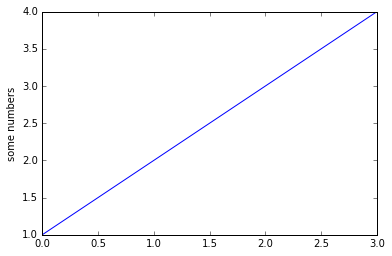

In [72]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

Perfect! Let's try now to plot our data.

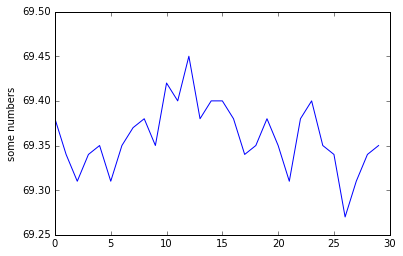

In [74]:
# no need for the import statement again because it's already imported
plt.plot(temp_table['K-type TC, °C'])
plt.ylabel('some numbers')
plt.show()

But now I also want the other column in the same plot! No problem. Just add another line.

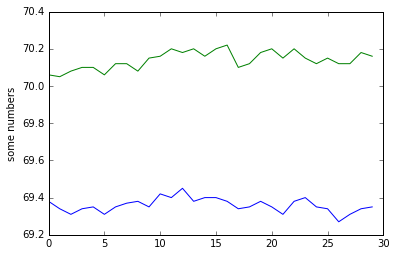

In [75]:
plt.plot(temp_table['K-type TC, °C'])
plt.plot(temp_table['T-type TC, °C'])
plt.ylabel('some numbers')
plt.show()

Awesome! Now I want to add in the title for the x-axis, y-axis, figure, label, and legend.

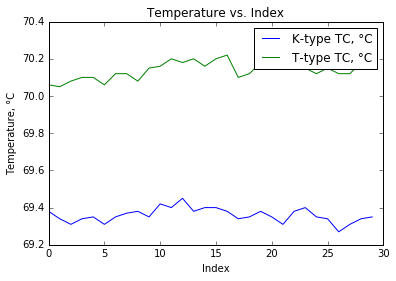

In [81]:
plt.plot(temp_table['K-type TC, °C'])
plt.plot(temp_table['T-type TC, °C'])
plt.ylabel('Temperature, °C')
plt.xlabel('Index')
plt.title('Temperature vs. Index')
plt.legend()
plt.show()

Sounds great! Now let's go a little bit further and decorate our plots. With some googling, "matplotlib change line styles" gave me http://matplotlib.org/examples/lines_bars_and_markers/line_styles_reference.html

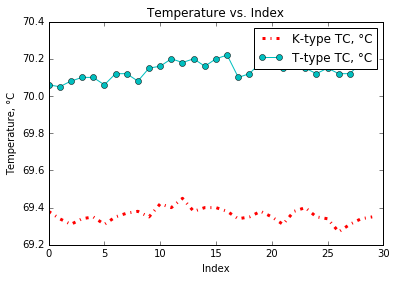

In [93]:
plt.plot(temp_table['K-type TC, °C'],'-.',color='r',linewidth=3)
plt.plot(temp_table['T-type TC, °C'],'o-',color='c')
plt.ylabel('Temperature, °C')
plt.xlabel('Index')
plt.title('Temperature vs. Index')
plt.legend()
plt.show()

Awesome. Let's say we have to plot the same thing over and over again for 10 different columns. That's going to be very annoying to do in Excel. So let's see if we can write up some function and "automate" this for us. I'm going to copy&paste all the code above and put it in a function.

In [94]:
def plotMyData(x,y):
    plt.plot(x, y,'-.',color='r',linewidth=3)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.title(y.name + " vs. " + x.name)
    plt.legend()
    plt.show()

Now I'm going plot several columns in the liquid_flow_table (because there are many columns). Again, let's take a look at the table again.

In [96]:
liquid_flow_table.head()

,Primary,Ultrasonic,mySum,myMultiplication,myPower,CumulativeSum,myDivision
8,18.19,17.45,35.64,317.4155,9.640079e+21,362.02,0.953462
9,18.19,17.67,35.86,321.4173,1.824920e+22,379.69,1.000000
6,28.55,27.23,55.78,777.4165,4.326677e+39,316.80,0.834365
7,28.55,27.77,56.32,792.8335,2.643515e+40,344.57,0.907503
4,39.62,38.02,77.64,1506.3524,5.658590e+60,251.10,0.661329


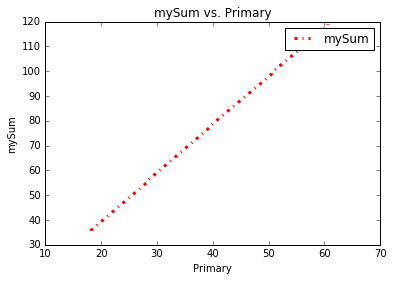

In [99]:
plotMyData(liquid_flow_table.Primary,liquid_flow_table.mySum)

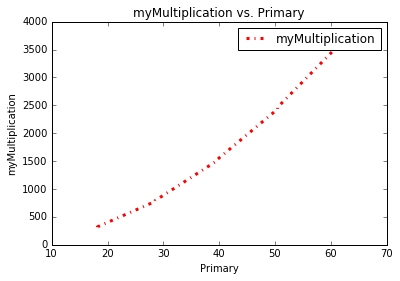

In [100]:
plotMyData(liquid_flow_table.Primary,liquid_flow_table.myMultiplication)

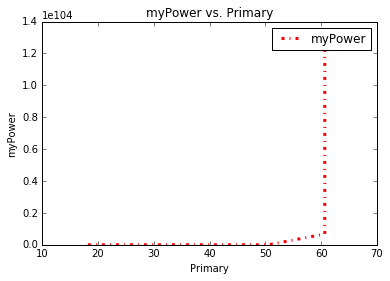

In [101]:
plotMyData(liquid_flow_table.Primary,liquid_flow_table.myPower)

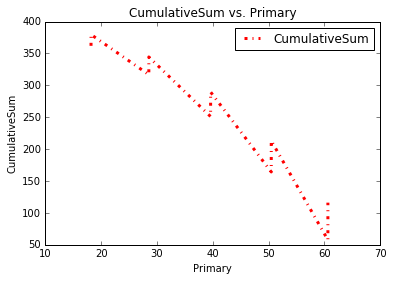

In [102]:
plotMyData(liquid_flow_table.Primary,liquid_flow_table.CumulativeSum)b

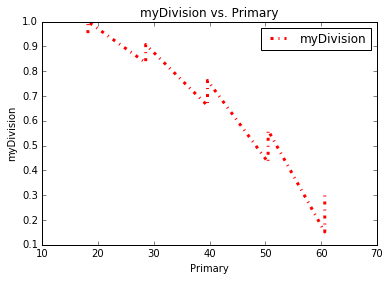

In [103]:
plotMyData(liquid_flow_table.Primary,liquid_flow_table.myDivision)

So 5 different plots, all in 5 lines! Imagine doing this in Excel! And in fact, programming is so awesome you can in fact not even have to copy&paste and do all that work.

In [104]:
liquid_table_columns_list = list(liquid_flow_table.columns.values)
liquid_table_columns_list

['Primary',
 'Ultrasonic',
 'mySum',
 'myMultiplication',
 'myPower',
 'CumulativeSum',
 'myDivision']

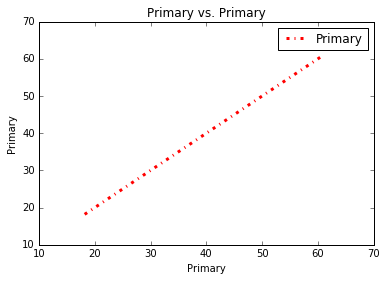

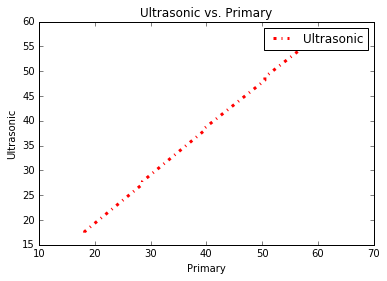

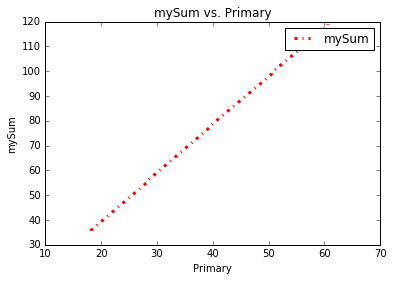

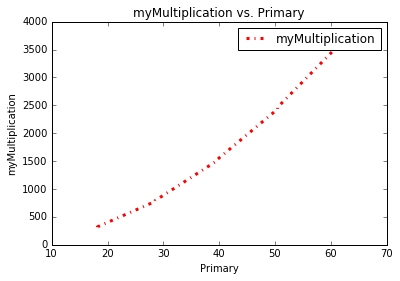

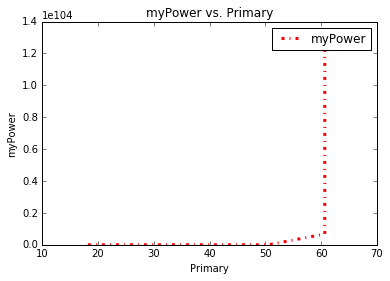

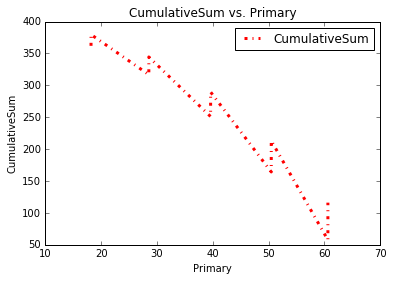

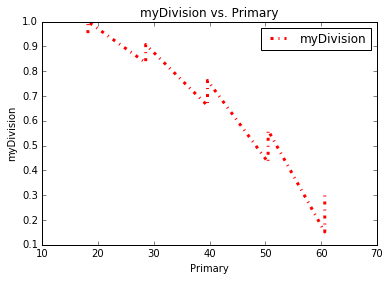

In [106]:
for column in liquid_table_columns_list:
    plotMyData(liquid_flow_table.Primary, liquid_flow_table[column])b

So if you're not still sold over this, I don't know what will :)

If we have time, let's open our GASISData. If you open it in excel, you can see that it's a huge table. About 19220 rows and maybe 60 columns. Let's read the file in and see how pandas handle it.

I'm going to use something that's specific to Jupyter Notebook to time how long it reads in the data.

In [110]:
%%timeit
xls = pd.read_csv(r'C:\Users\jenng\Documents\texaspse-blog\media\f16-scientific-python\week2\GASISData.csv')

C:\Anaconda3\lib\site-packages\IPython\core\magic.py:193: DtypeWarning: Columns (23,24,27,28,29,51,52,61,126,135,136,141,142,143,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)
C:\Anaconda3\lib\site-packages\IPython\core\magics\execution.py:1046: DtypeWarning: Columns (23,24,27,28,29,51,52,61,126,135,136,141,142,143,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  all_runs = timer.repeat(repeat, number)


1 loop, best of 3: 664 ms per loop


So took about 664 ms per loop to read that in. That's pretty cool!